In [1]:
import pandas as pd
import seaborn as sns
sns.set(rc={'figure.figsize':(10,7)})

import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import numpy as np

In [2]:
data=pd.read_csv("D:/my_work/python_codes/git_projects/car_insurance_claim_prediction/dataset/train.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-null  object 
 11  max_power                         58592 non-null  object 
 12  engi

Many features are objects and policy_tenure, age_of_car,age_of_policyholder are normalised by default

In [4]:
data["is_claim"].value_counts()

0    54844
1     3748
Name: is_claim, dtype: int64

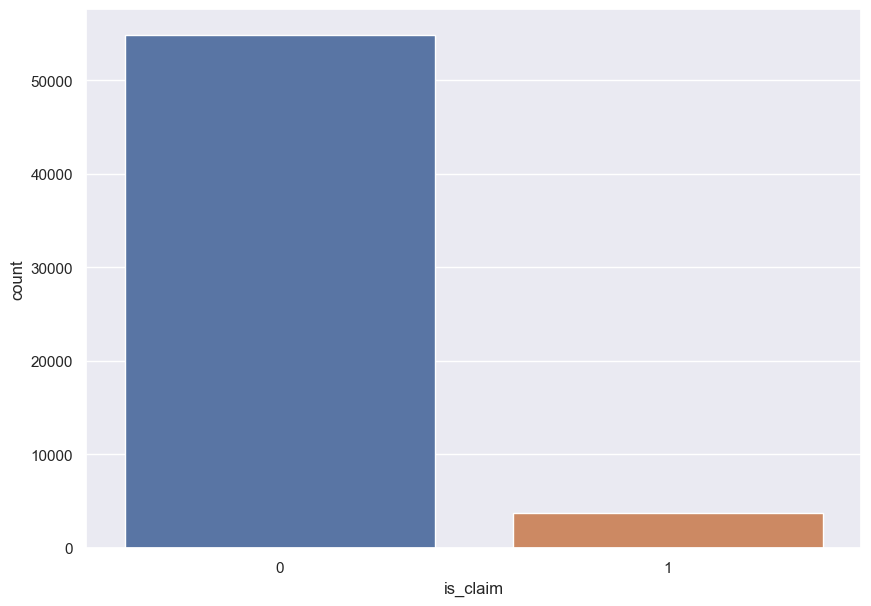

In [5]:
sns.countplot(x=data["is_claim"])
plt.show()

Highly skewed dataset. Use oversampling, upweighting etc

In [6]:
data=data.drop("policy_id",axis=1)

No need of policy ID because it is not corelated to the output/target

In [7]:
data.isnull().sum()

policy_tenure                       0
age_of_car                          0
age_of_policyholder                 0
area_cluster                        0
population_density                  0
make                                0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
gear_box                            0
steering_type                       0
turning_radius                      0
length                              0
width       

No null values

In [8]:
cat_features=data.select_dtypes(include="object").columns
len(cat_features)

27

Encode the objects using label encoding

C:\Users\dhanu\AppData\Local\Temp\ipykernel_11832\2155212185.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


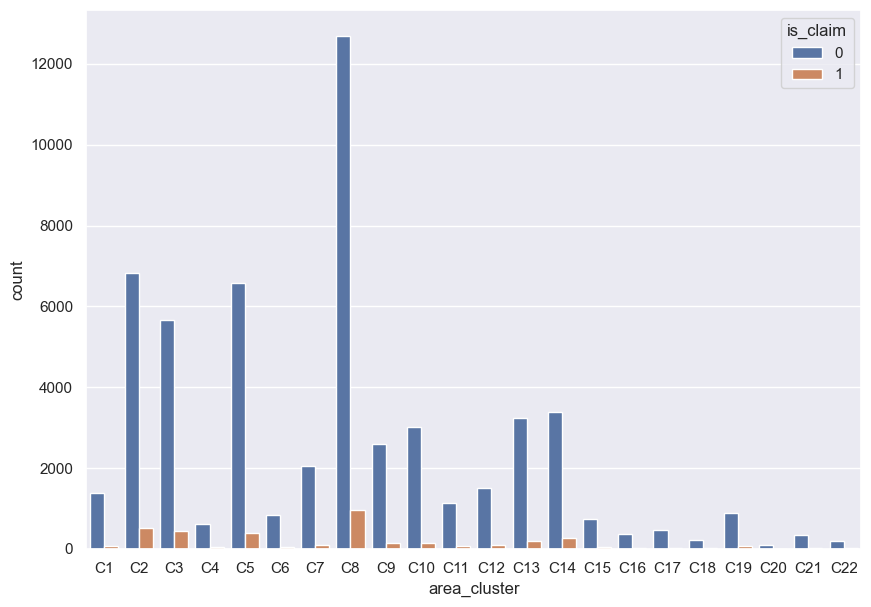

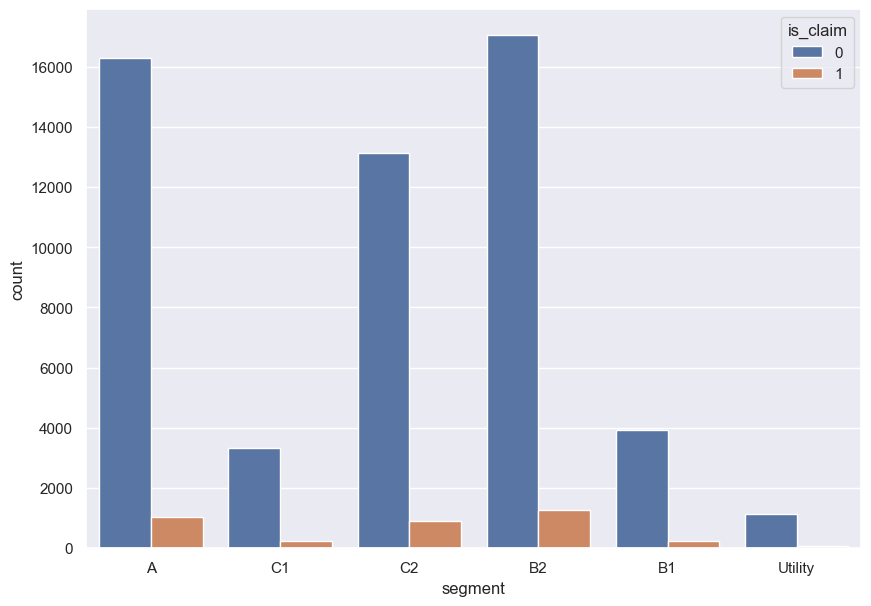

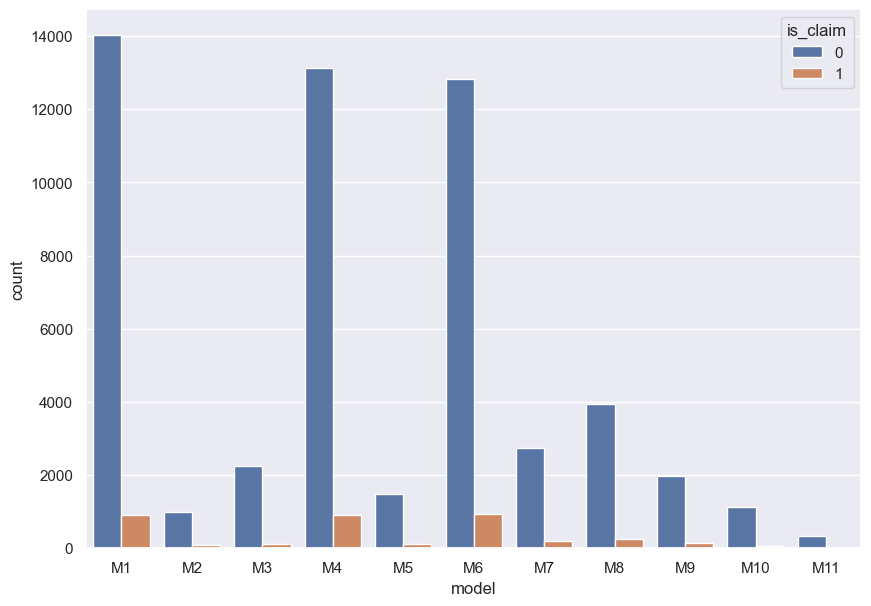

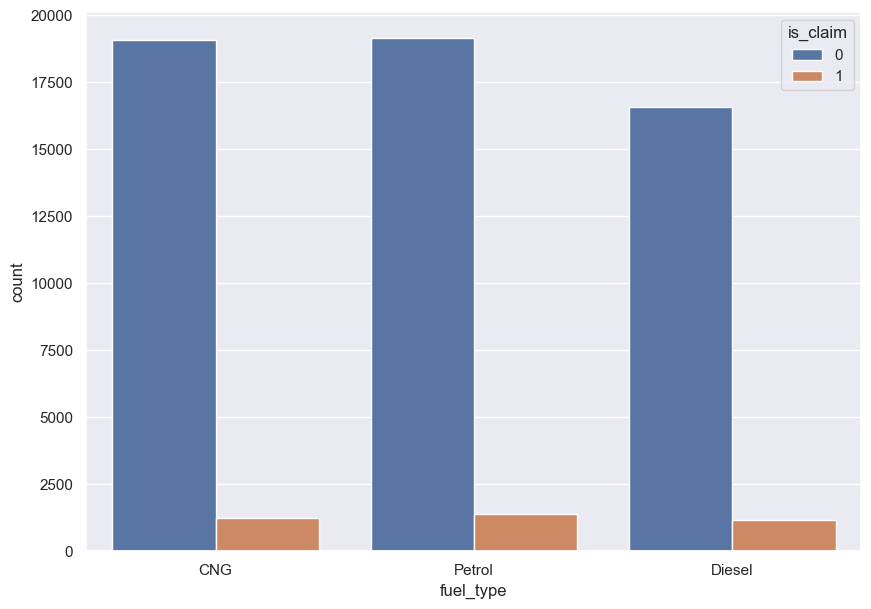

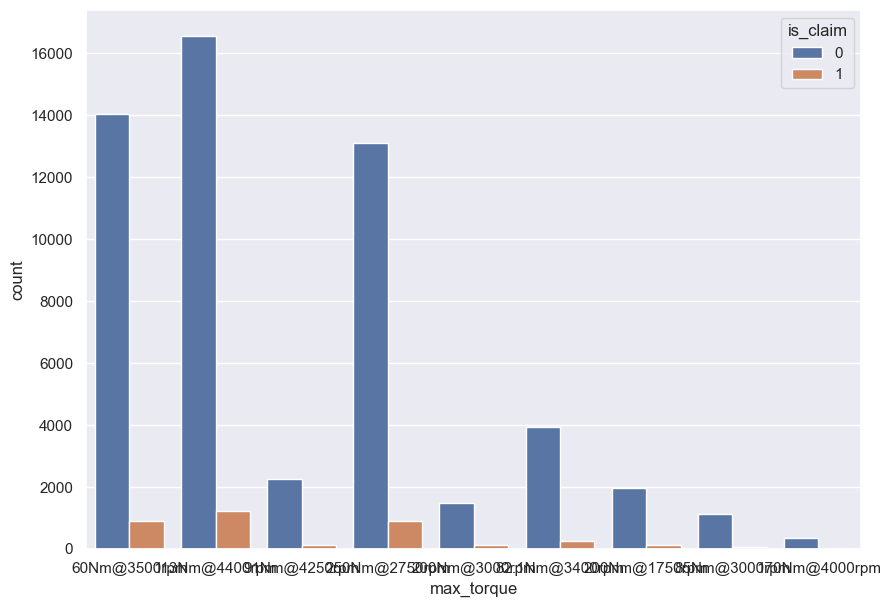

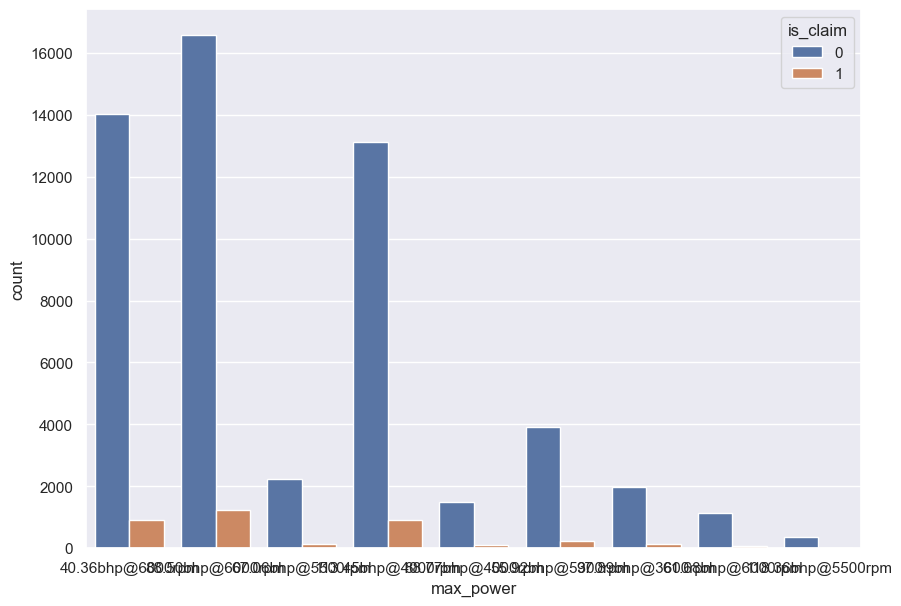

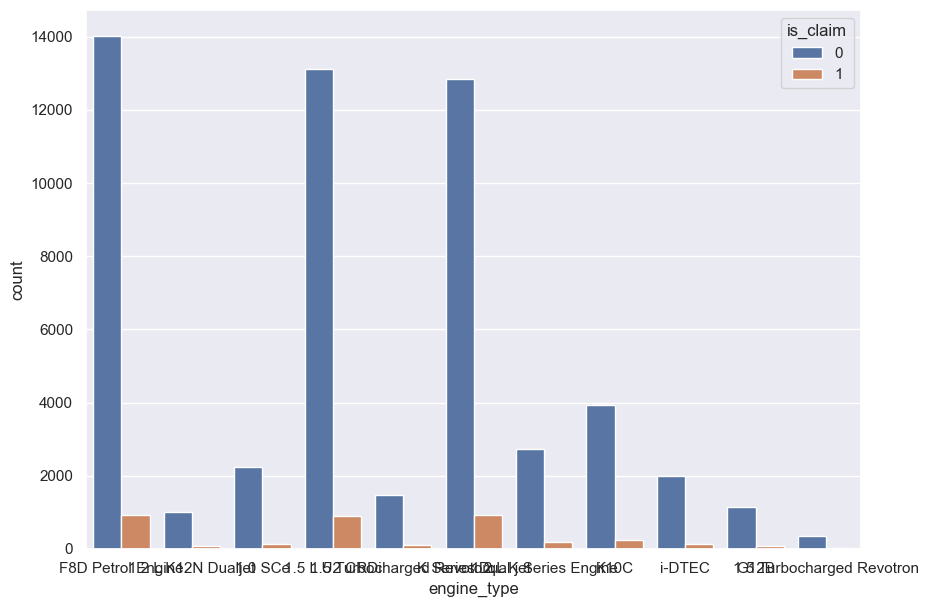

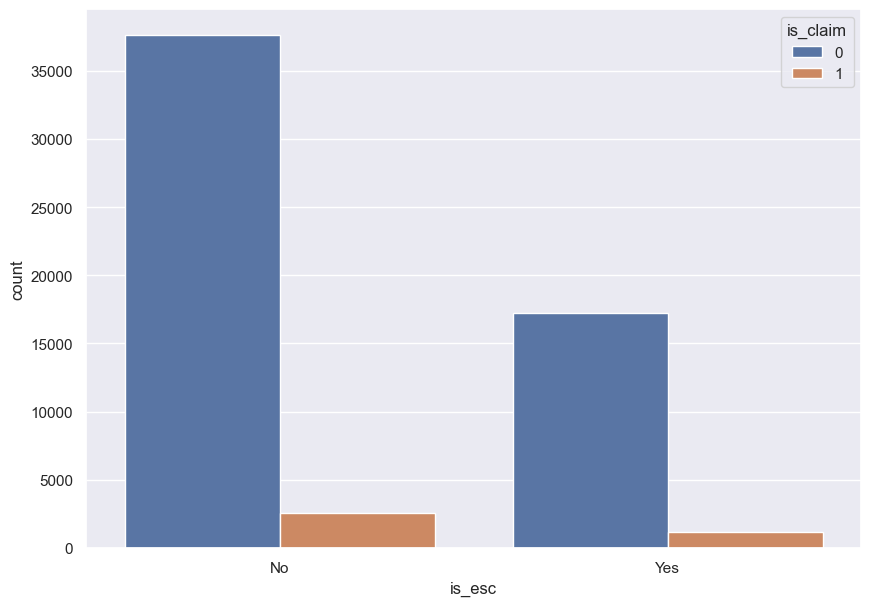

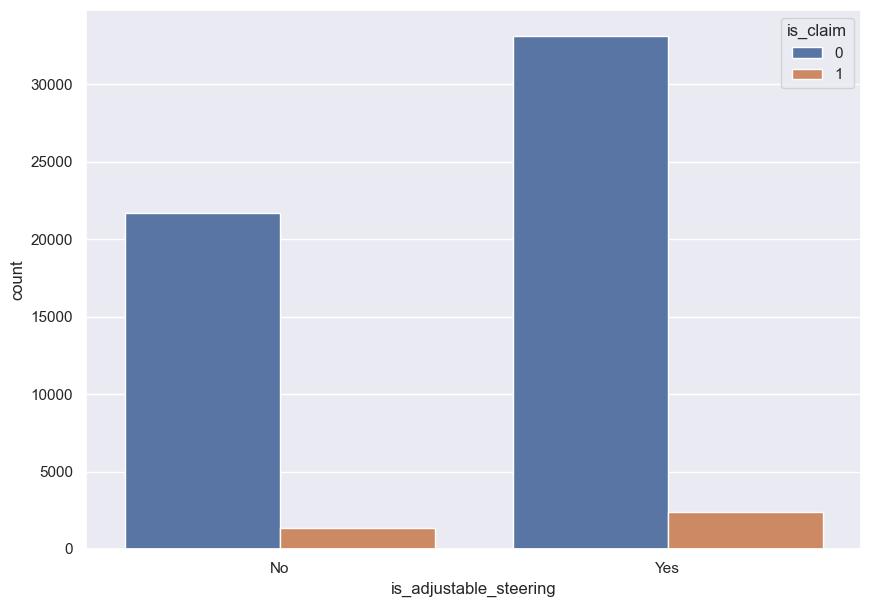

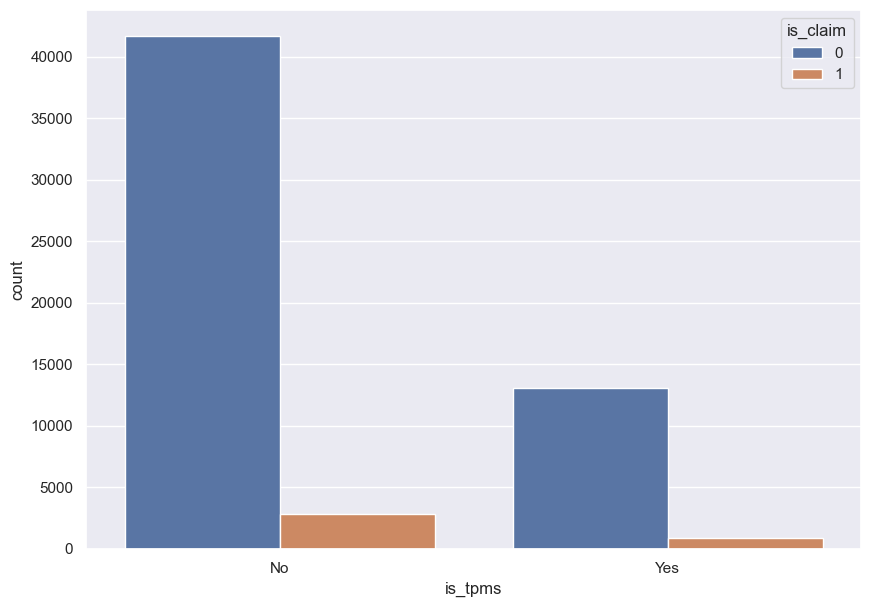

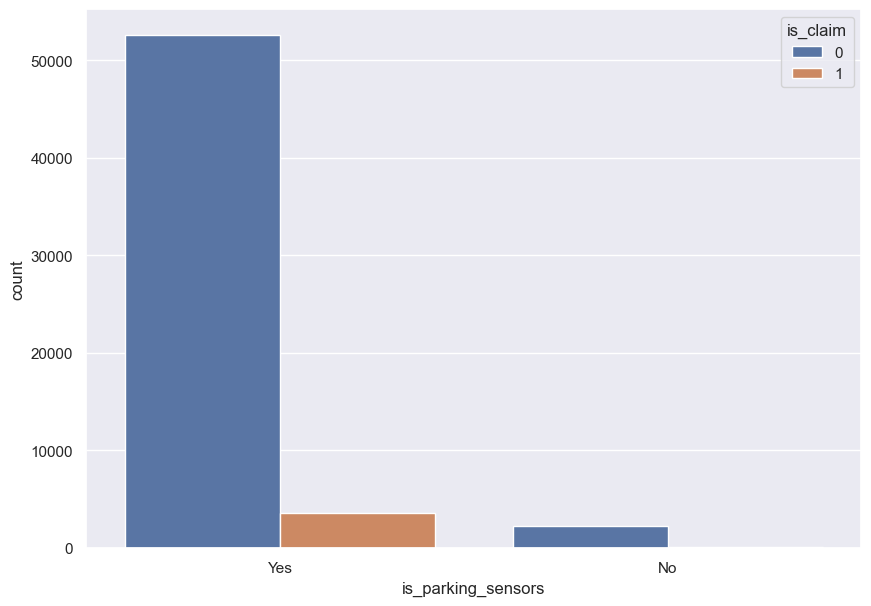

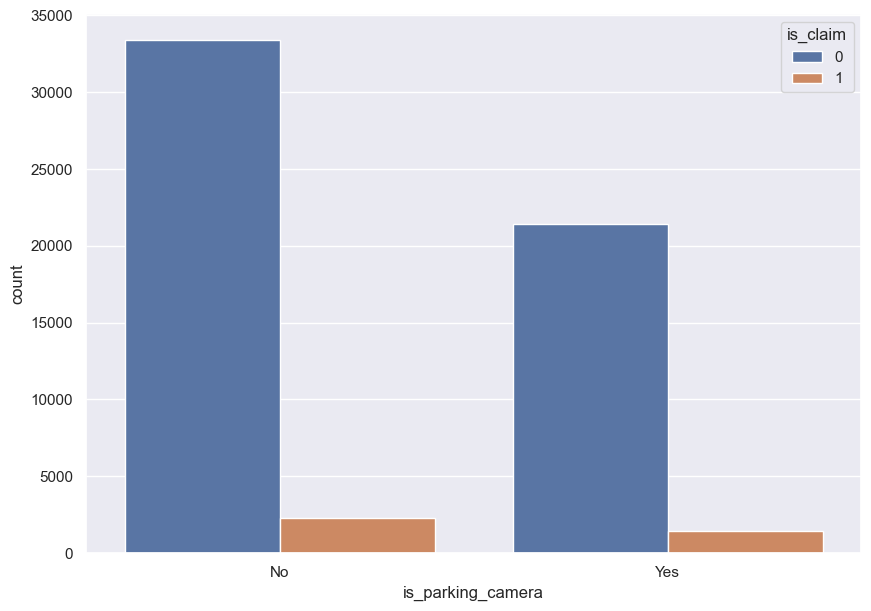

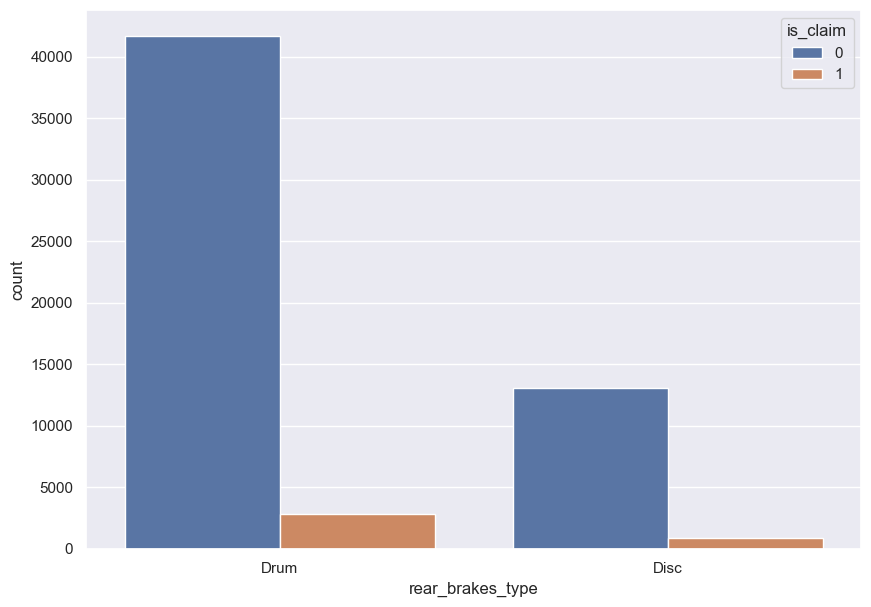

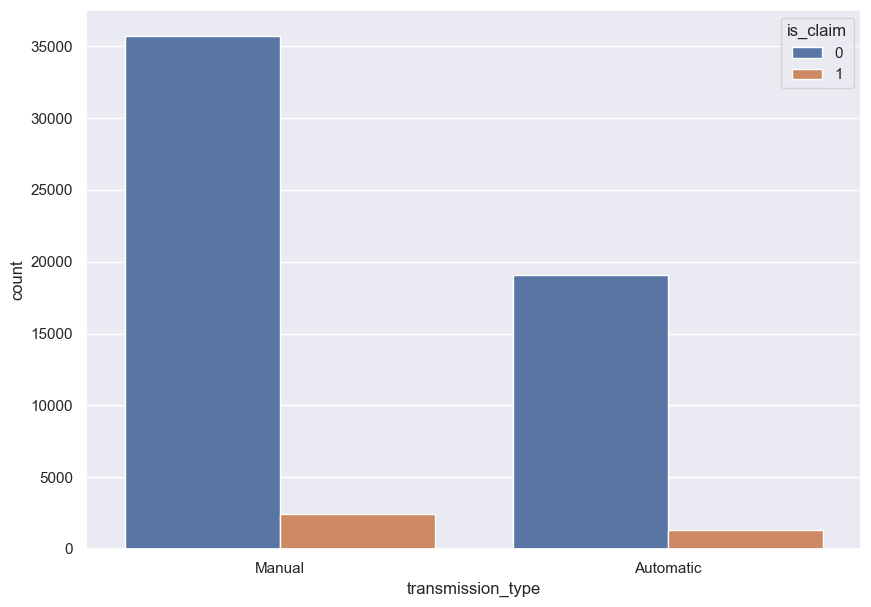

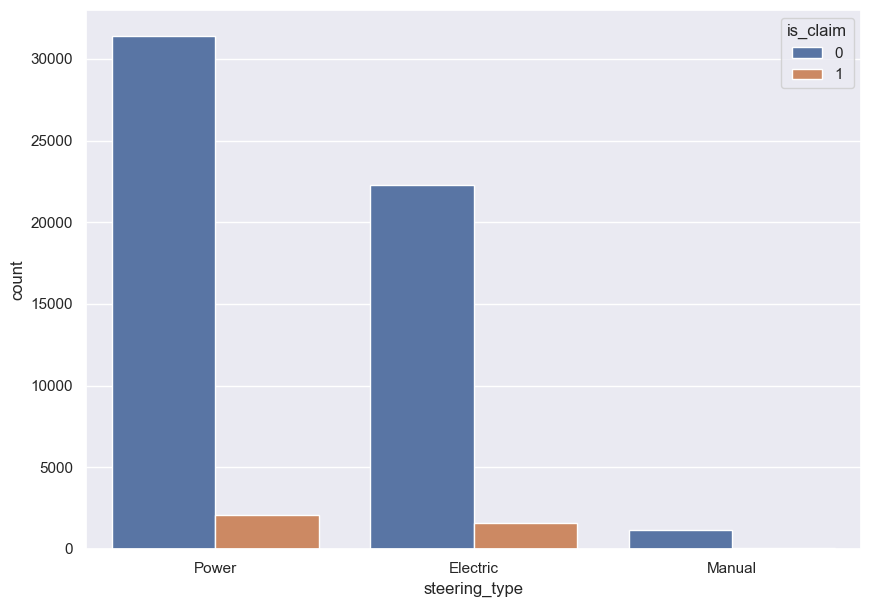

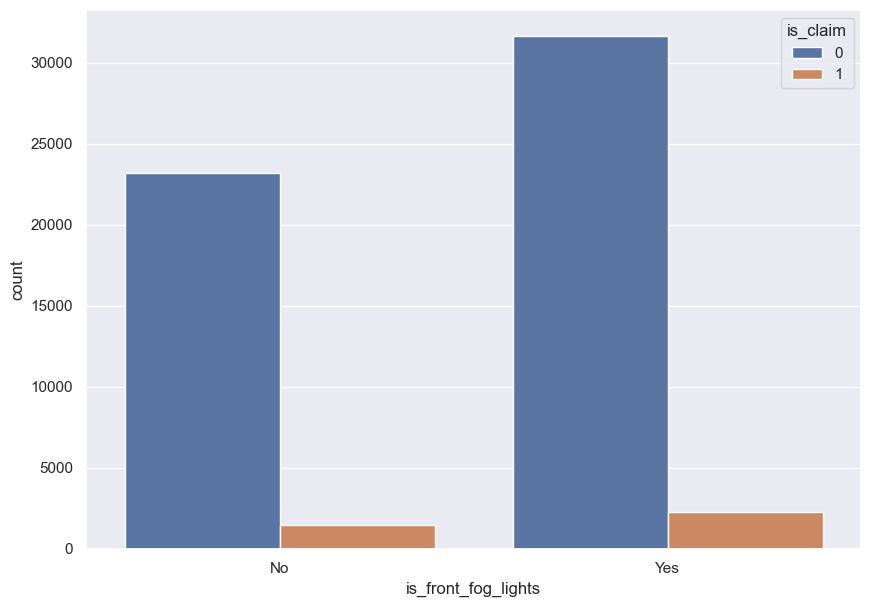

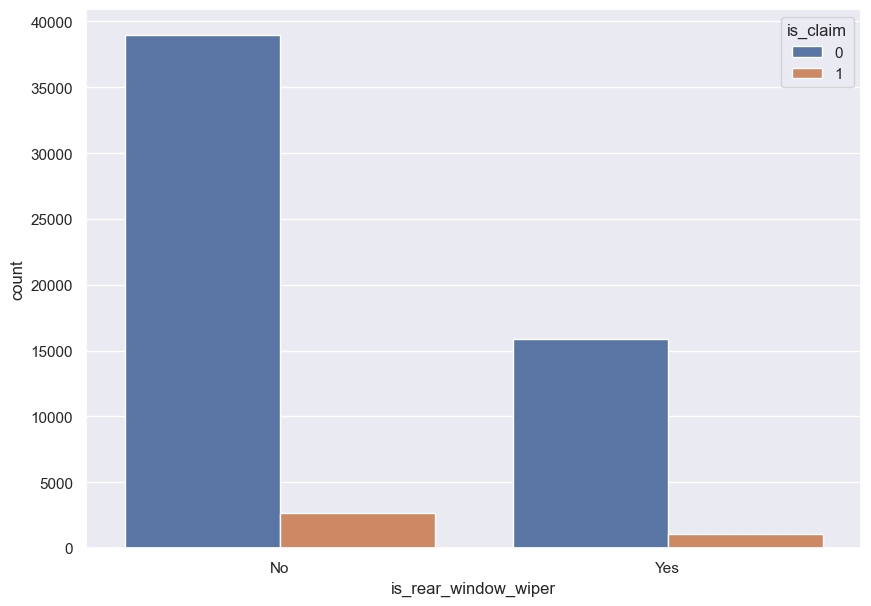

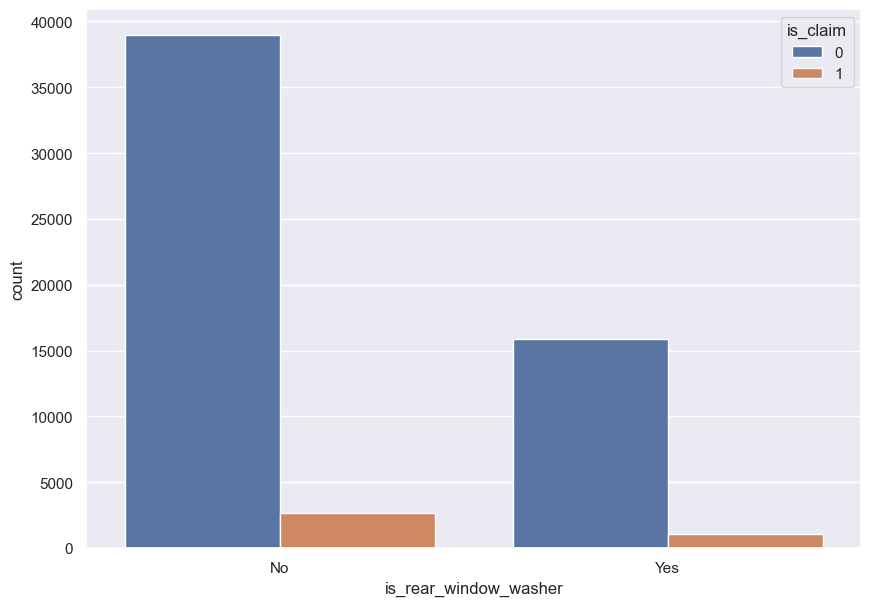

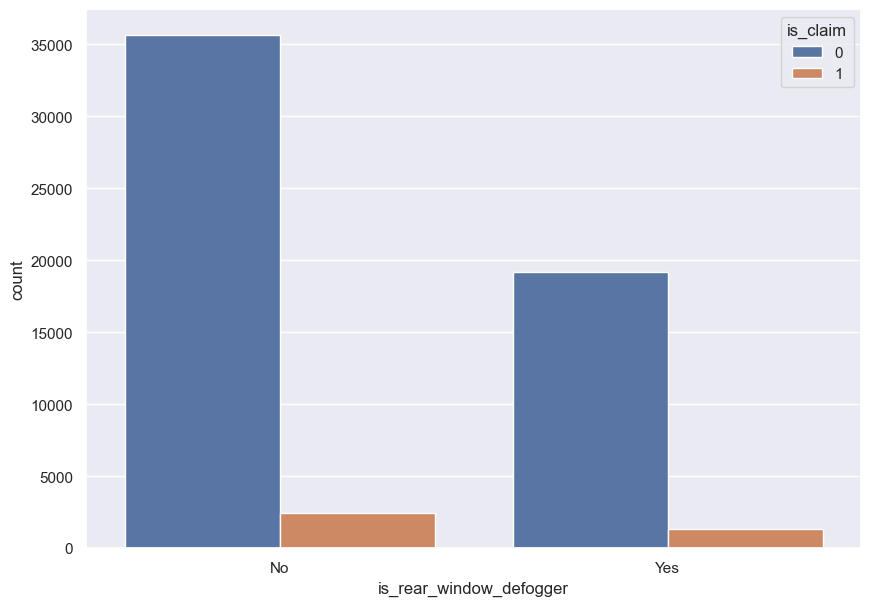

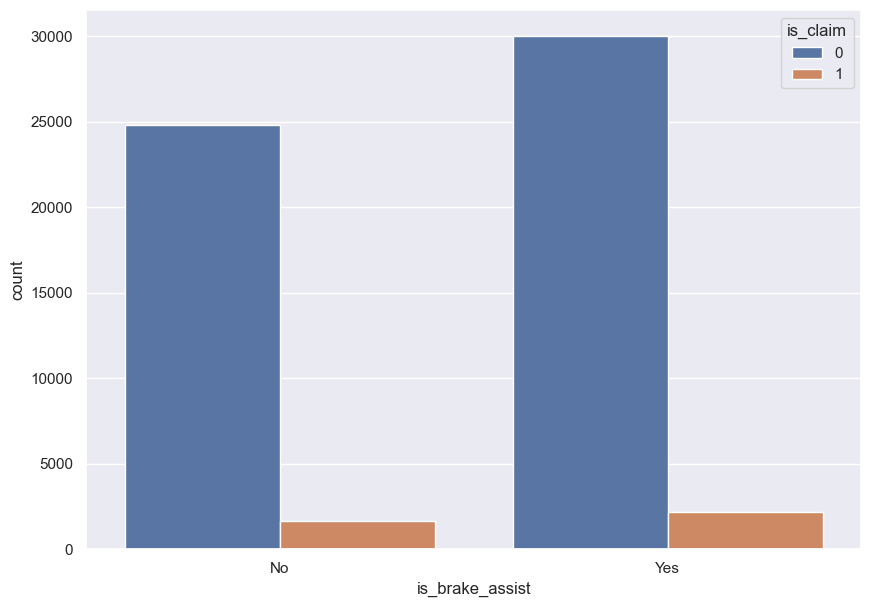

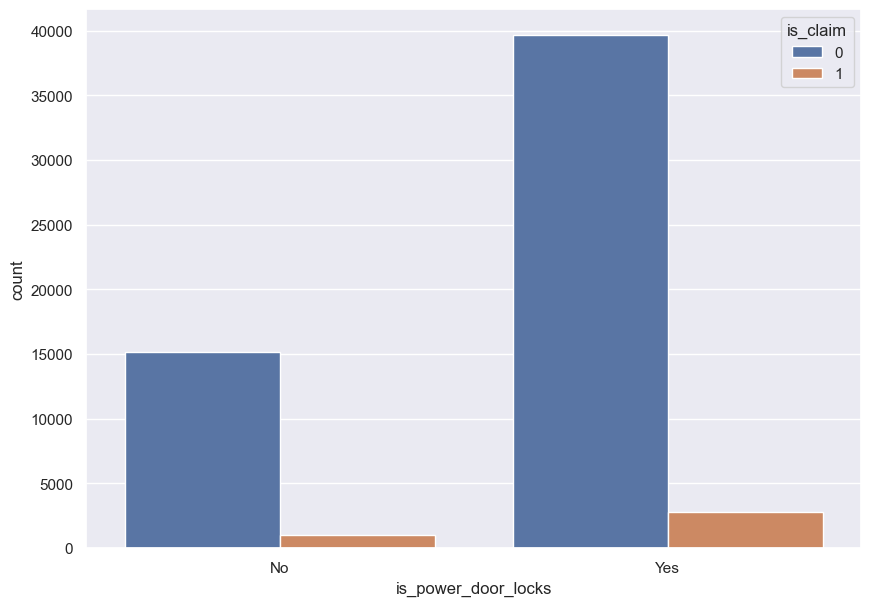

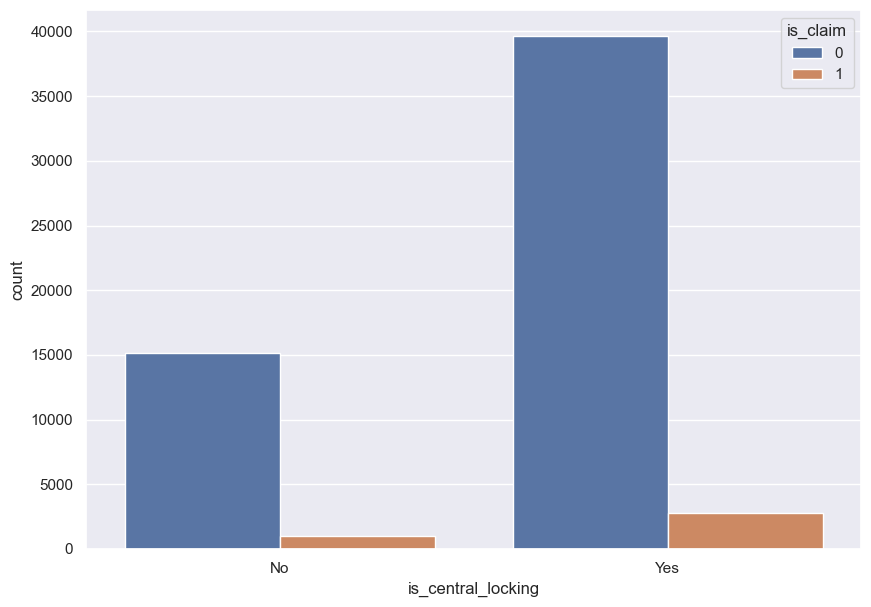

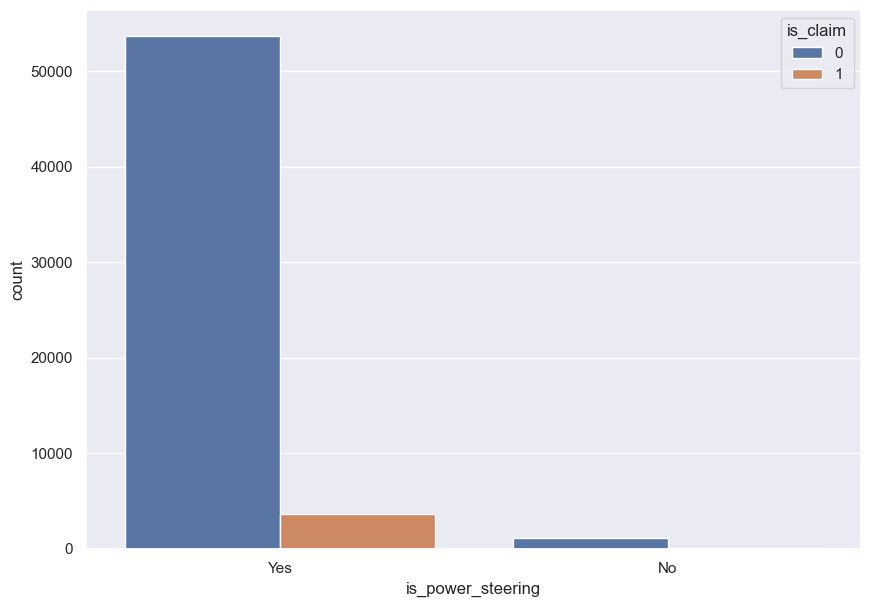

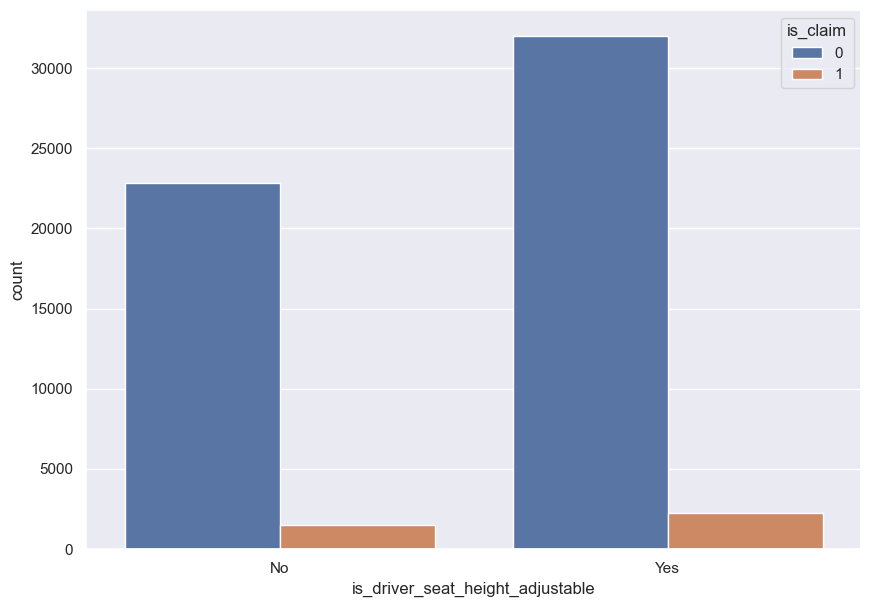

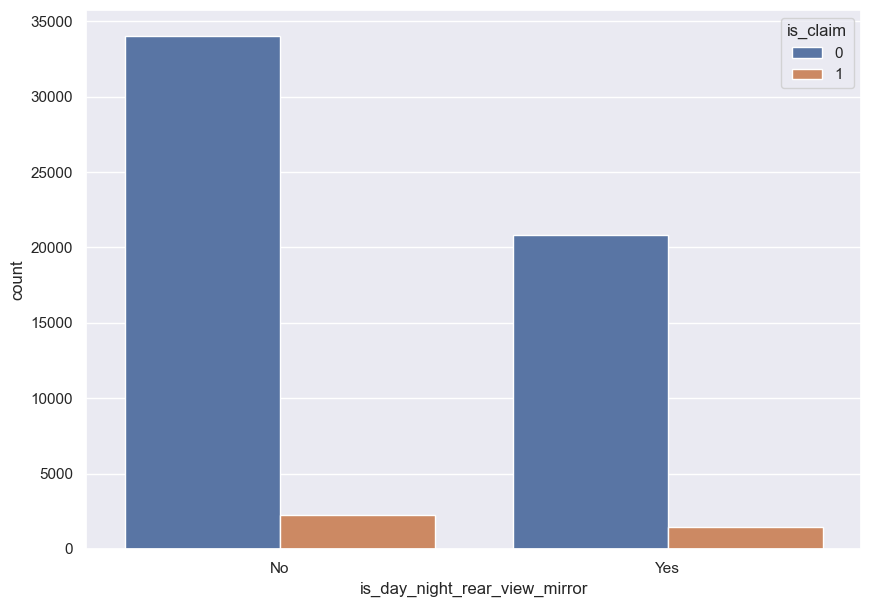

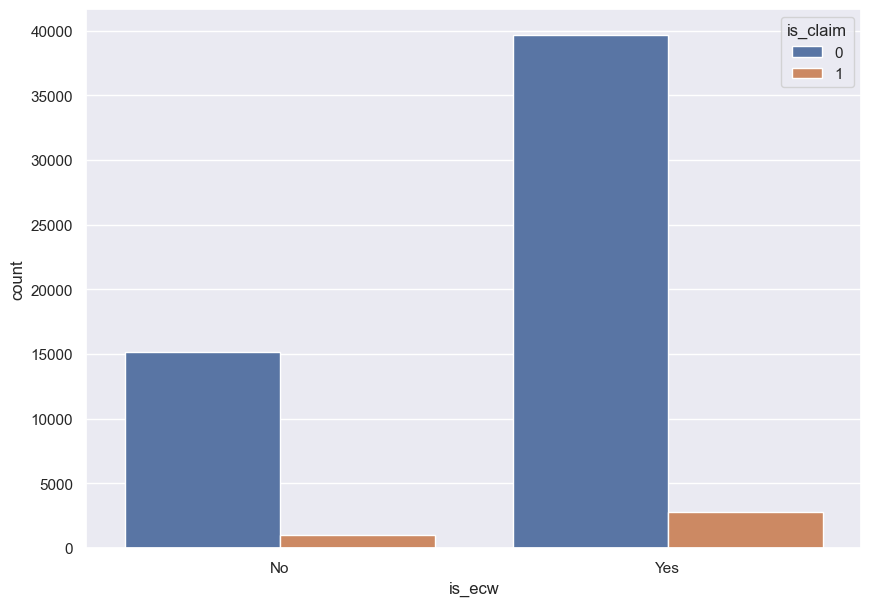

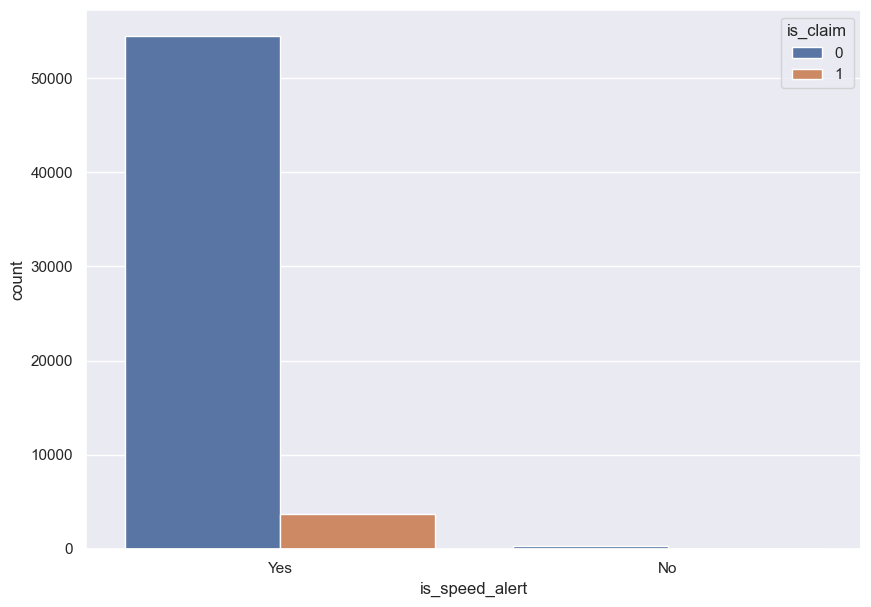

In [9]:
for i in cat_features:
    plt.figure()
    sns.countplot(x=data[i],hue=data["is_claim"])
plt.show()

Many features do not represent anything significantly

C:\Users\dhanu\AppData\Local\Temp\ipykernel_11832\2617353437.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


<Figure size 1000x700 with 0 Axes>

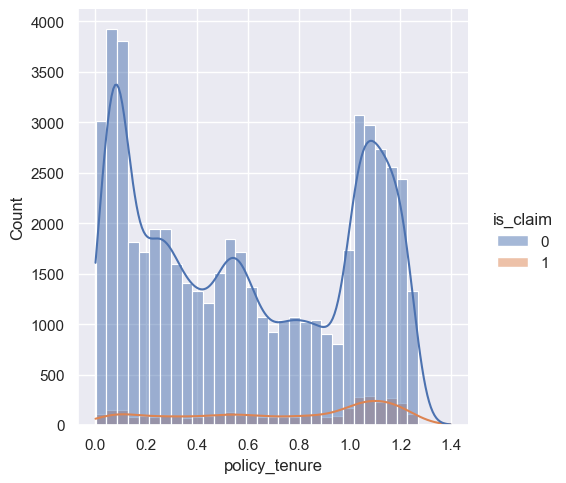

<Figure size 1000x700 with 0 Axes>

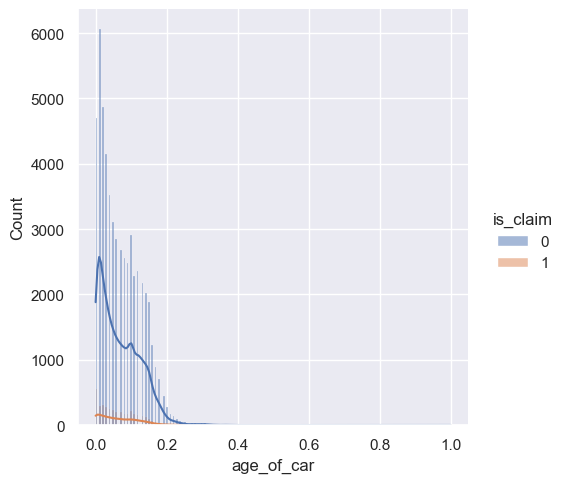

<Figure size 1000x700 with 0 Axes>

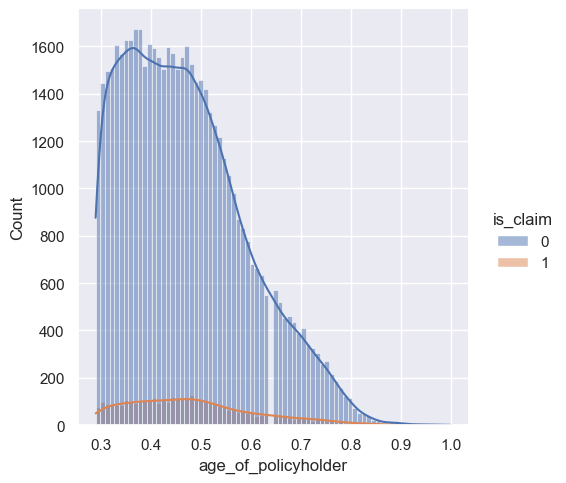

<Figure size 1000x700 with 0 Axes>

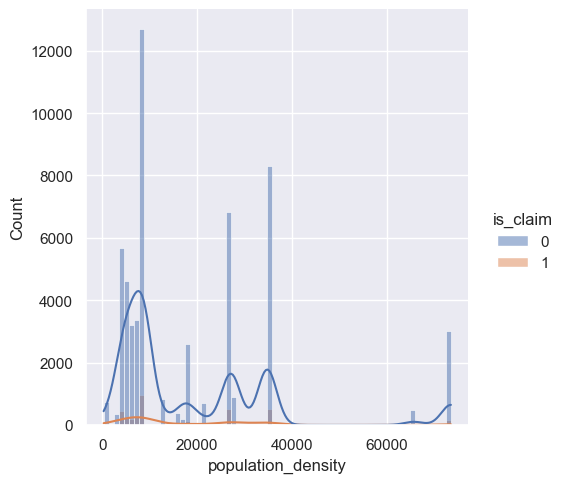

<Figure size 1000x700 with 0 Axes>

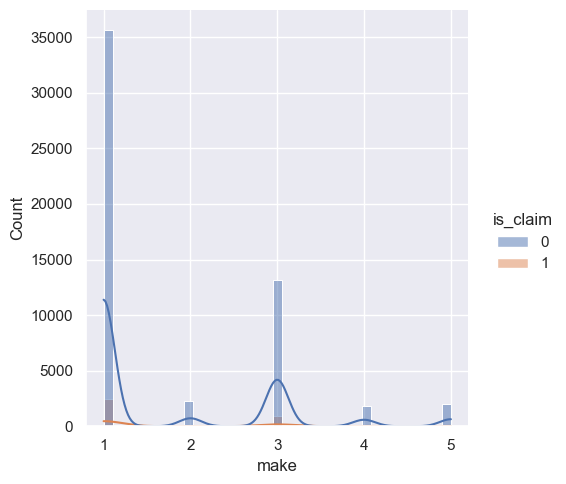

<Figure size 1000x700 with 0 Axes>

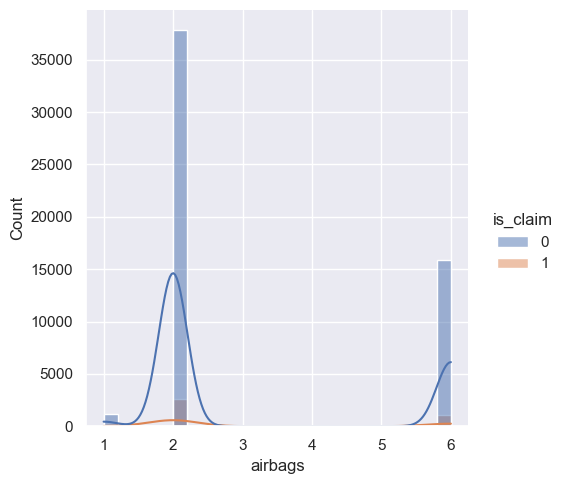

<Figure size 1000x700 with 0 Axes>

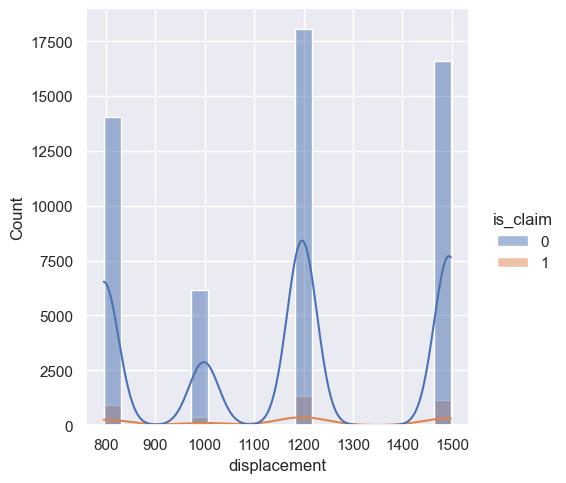

<Figure size 1000x700 with 0 Axes>

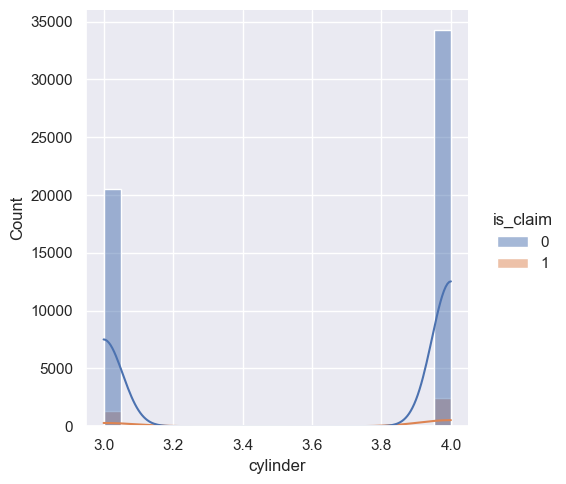

<Figure size 1000x700 with 0 Axes>

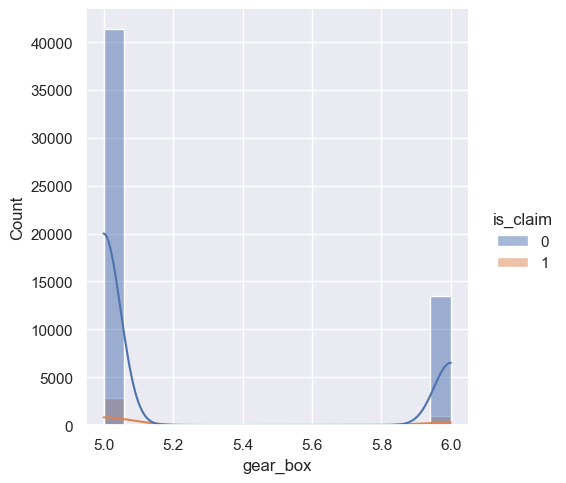

<Figure size 1000x700 with 0 Axes>

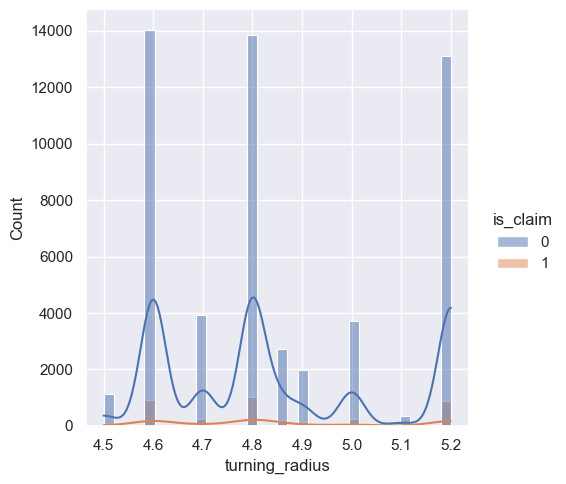

<Figure size 1000x700 with 0 Axes>

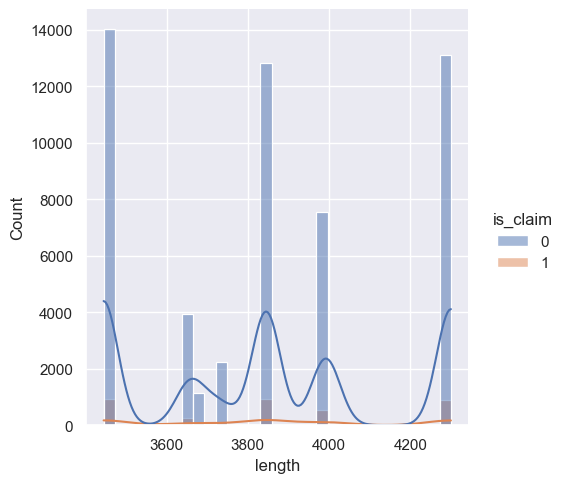

<Figure size 1000x700 with 0 Axes>

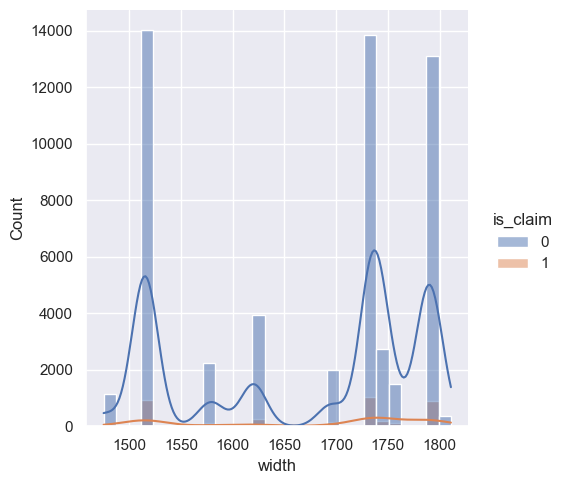

<Figure size 1000x700 with 0 Axes>

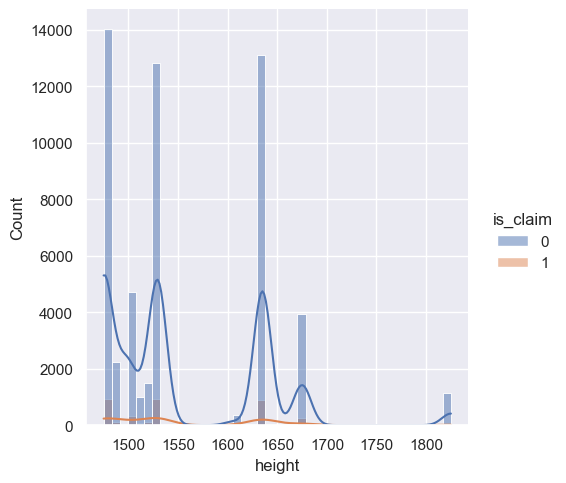

<Figure size 1000x700 with 0 Axes>

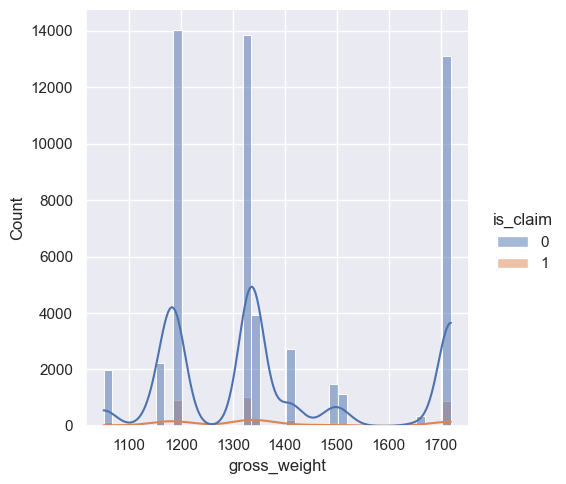

<Figure size 1000x700 with 0 Axes>

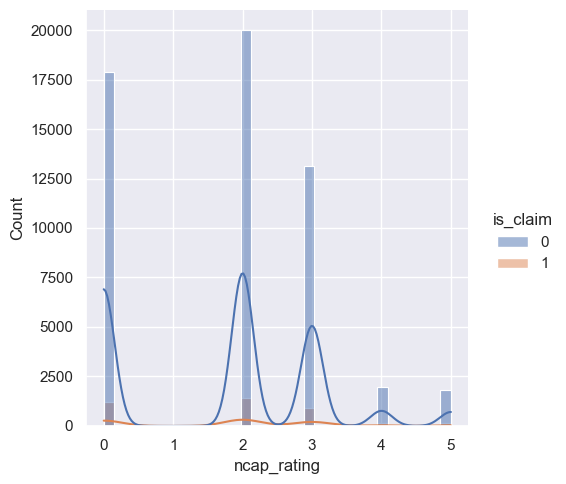

In [10]:
#numerics = [ 'int64']
#newdf = data.select_dtypes(include=numerics)
num_features=data.select_dtypes(include="number").columns
num_features=num_features.drop("is_claim")
for i in num_features:
    plt.figure()
    sns.displot(x=data[i],kind="hist",kde=True,hue=data["is_claim"])
plt.show()

In [11]:
enc=LabelEncoder()
for i in cat_features:
    data[i]=enc.fit_transform(data[i])

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 43 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_tenure                     58592 non-null  float64
 1   age_of_car                        58592 non-null  float64
 2   age_of_policyholder               58592 non-null  float64
 3   area_cluster                      58592 non-null  int32  
 4   population_density                58592 non-null  int64  
 5   make                              58592 non-null  int64  
 6   segment                           58592 non-null  int32  
 7   model                             58592 non-null  int32  
 8   fuel_type                         58592 non-null  int32  
 9   max_torque                        58592 non-null  int32  
 10  max_power                         58592 non-null  int32  
 11  engine_type                       58592 non-null  int32  
 12  airb

Label encoding is better than onehot encoding

In [12]:
corr=data.corr()
corr["is_claim"].sort_values(ascending=False)

is_claim                            1.000000
policy_tenure                       0.078747
age_of_policyholder                 0.022435
is_adjustable_steering              0.013917
cylinder                            0.013434
is_front_fog_lights                 0.011825
is_brake_assist                     0.010893
is_driver_seat_height_adjustable    0.010686
width                               0.009947
fuel_type                           0.009612
area_cluster                        0.009425
is_parking_sensors                  0.008419
is_day_night_rear_view_mirror       0.007989
displacement                        0.007678
max_power                           0.007573
is_speed_alert                      0.007307
is_central_locking                  0.006637
is_ecw                              0.006637
is_power_door_locks                 0.006637
model                               0.006548
length                              0.006495
segment                             0.006366
gross_weig

### Select the following features and see
policy_tenure                       0.078747,
age_of_policyholder                 0.022435,
is_adjustable_steering              0.013917,
cylinder                            0.013434,
is_front_fog_lights                 0.011825,
is_brake_assist                     0.010893,
is_driver_seat_height_adjustable    0.010686,
steering_type                      -0.009608,
max_torque                         -0.014390,
population_density                 -0.017808,
age_of_car                         -0.028172